# Dataset

In [3]:
pip install pandas



  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata (18 kB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge, LassoLars
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [6]:
data = pd.read_csv('bodyfat_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'bodyfat_dataset.csv'

In [24]:
data.shape

(436, 16)

In [25]:
data.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [26]:
data.describe()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,20.249839,34.545872,72.282203,1.734048,35.250917,94.158028,82.816055,98.652294,56.039679,37.365596,22.351835,29.897248,26.482110,17.139908
std,7.502125,15.500099,15.464366,0.098359,3.837908,10.931688,14.652729,6.895034,6.194143,2.768403,1.780513,3.944843,3.155306,1.582291
min,0.000000,1.000000,42.184800,0.750000,26.000000,43.000000,58.000000,82.500000,38.000000,24.700000,18.000000,20.500000,20.000000,13.500000
25%,15.022500,21.000000,59.875200,1.668780,31.500000,85.500000,70.000000,94.000000,51.500000,35.400000,21.000000,26.950000,23.700000,16.000000
50%,20.500000,28.500000,70.815800,1.730000,35.450000,93.050000,82.850000,98.300000,56.000000,37.500000,22.300000,29.800000,26.650000,17.300000
75%,25.410000,46.000000,81.560000,1.800000,38.300000,101.425000,93.225000,102.500000,60.000000,39.000000,23.300000,32.625000,29.200000,18.400000
max,47.500000,81.000000,164.720000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BodyFat   436 non-null    float64
 1   Original  436 non-null    object 
 2   Sex       436 non-null    object 
 3   Age       436 non-null    int64  
 4   Weight    436 non-null    float64
 5   Height    436 non-null    float64
 6   Neck      436 non-null    float64
 7   Chest     436 non-null    float64
 8   Abdomen   436 non-null    float64
 9   Hip       436 non-null    float64
 10  Thigh     436 non-null    float64
 11  Knee      436 non-null    float64
 12  Ankle     436 non-null    float64
 13  Biceps    436 non-null    float64
 14  Forearm   436 non-null    float64
 15  Wrist     436 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 54.6+ KB


In [28]:
data.isnull()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
432,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
433,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
X = data.drop(columns=['Original','BodyFat'])
y= data['BodyFat']

In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Misalkan kolom 'Gender' berisi 'F' dan 'M'
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # 'F' menjadi 0 dan 'M' menjadi 1

#  Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Menampilkan hasil
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r_squared}')

Mean Absolute Error: 3.446290909090909
R-squared: 0.6085236161543043


## pake skaler

In [41]:

X = data.drop(columns=['Original','BodyFat'])
y= data['BodyFat']
from sklearn.preprocessing import LabelEncoder

# Misalkan kolom 'Gender' berisi 'F' dan 'M'
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # 'F' menjadi 0 dan 'M' menjadi 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Menampilkan hasil
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r_squared}')
## pake skaler



NameError: name 'StandardScaler' is not defined

## crosvallidation

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Misalkan data sudah ada dalam DataFrame 'data'
X = data.drop(columns=['Original', 'BodyFat'])
y = data['BodyFat']

# Label Encoding untuk kolom 'Sex'
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])  # 'F' menjadi 0 dan 'M' menjadi 1

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor()

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
mean_cv_score = -cv_scores.mean()  # Mengubah nilai negatif menjadi positif

# Train the model on the entire training set
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Menampilkan hasil
print(f'Mean Absolute Error (CV): {mean_cv_score}')
print(f'Mean Absolute Error (Test): {mae}')
print(f'R-squared: {r_squared}')

Mean Absolute Error (CV): 3.677380151260504
Mean Absolute Error (Test): 3.359456818181817
R-squared: 0.6153512822253722


In [46]:
pip install matplotlib

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.5 MB 730.2 kB/s eta 0:00:10
   ---- ----------------------------------- 0.8/7.5 MB 838.9 kB/s eta 0:00:09
   ---- ----------------------------------- 0.8/7.5 MB 838.9 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/7.5 MB 719.5 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/7.5 MB 719.5 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/7.5 MB 699.0 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/7

## Feature Importance

    Feature  Importance
7       Hip    0.348755
6   Abdomen    0.238572
3    Height    0.103183
0       Sex    0.046693
1       Age    0.032466
13    Wrist    0.030239
12  Forearm    0.029279
4      Neck    0.029229
2    Weight    0.028825
11   Biceps    0.026425
9      Knee    0.024479
5     Chest    0.023861
8     Thigh    0.019771
10    Ankle    0.018223


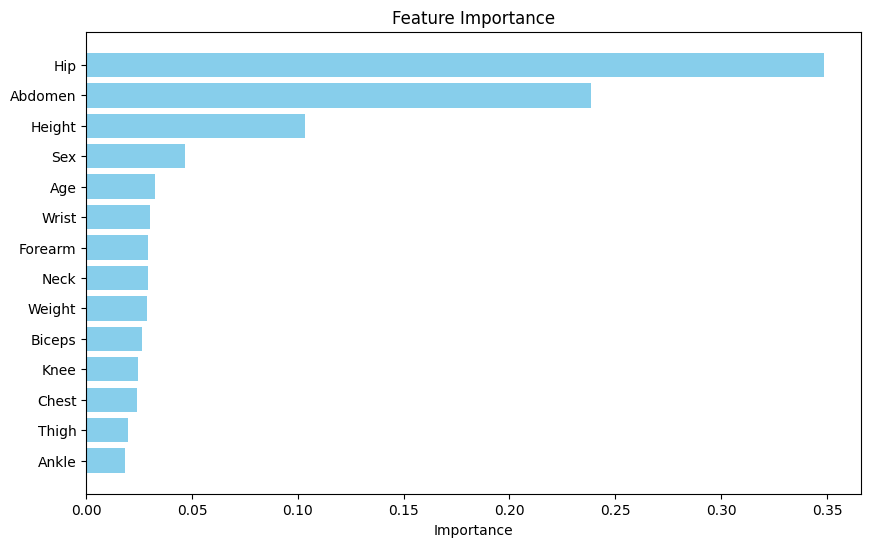

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Misalkan data sudah ada dalam DataFrame 'data'
X = data.drop(columns=['Original', 'BodyFat'])
y = data['BodyFat']

# Label Encoding untuk kolom 'Sex'
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])  # 'F' menjadi 0 dan 'M' menjadi 1

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Menghitung feature importance
importances = model.feature_importances_
feature_names = X.columns

# Membuat DataFrame untuk menampilkan fitur dan importansinya
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan feature importance
print(feature_importance_df)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Membalik sumbu y untuk menampilkan fitur terpenting di atas
plt.show()

## tuning grid search

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Mean Absolute Error (Test): 3.577427667149213
R-squared: 0.5796576424372157


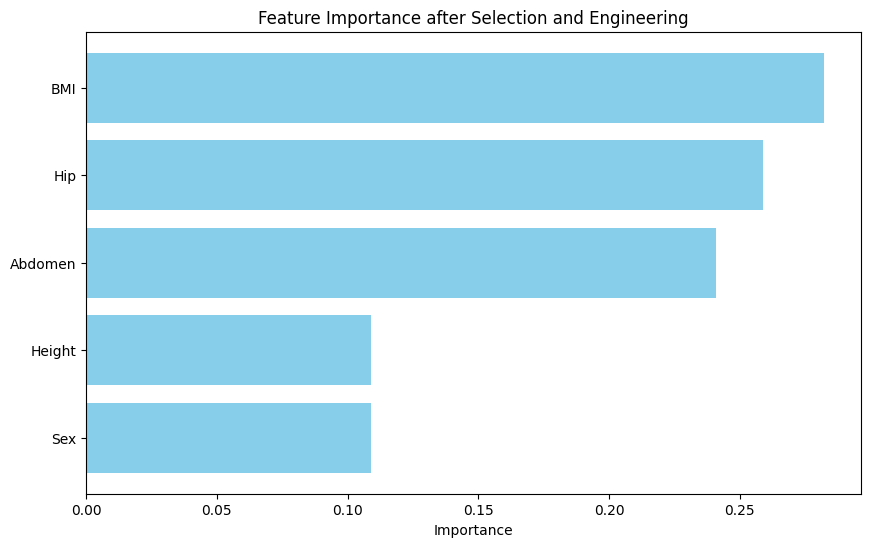

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Misalkan data sudah ada dalam DataFrame 'data'
X = data.drop(columns=['Original', 'BodyFat'])
y = data['BodyFat']

# Label Encoding untuk kolom 'Sex'
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])  # 'F' menjadi 0 dan 'M' menjadi 1

# Feature Engineering: Menambahkan fitur BMI
X['BMI'] = X['Weight'] / (X['Height'] / 100) ** 2  # Menghitung BMI

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Feature Selection: Menggunakan hanya fitur penting
important_features = ['Hip', 'Abdomen', 'Height', 'Sex', 'BMI']  # Fitur yang dipilih berdasarkan feature importance
X_train_selected = X_train[:, [X.columns.get_loc(f) for f in important_features]]
X_test_selected = X_test[:, [X.columns.get_loc(f) for f in important_features]]

# Hyperparameter Tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_absolute_error', 
                           verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_selected, y_train)

# Make predictions
predictions = best_model.predict(X_test_selected)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Menampilkan hasil
print(f'Mean Absolute Error (Test): {mae}')
print(f'R-squared: {r_squared}')

# Visualisasi feature importance dari model terbaik
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': important_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance after Selection and Engineering')
plt.gca().invert_yaxis()  # Membalik sumbu y untuk menampilkan fitur terpenting di atas
plt.show()

## gradient boosting

Selected Features: Index(['Sex', 'Height', 'Abdomen', 'Hip', 'BMI'], dtype='object')
Mean Cross-Validated MAE: 3.749713477121195
Mean Absolute Error (Test): 3.6759087449581576
R-squared: 0.5755860894145641


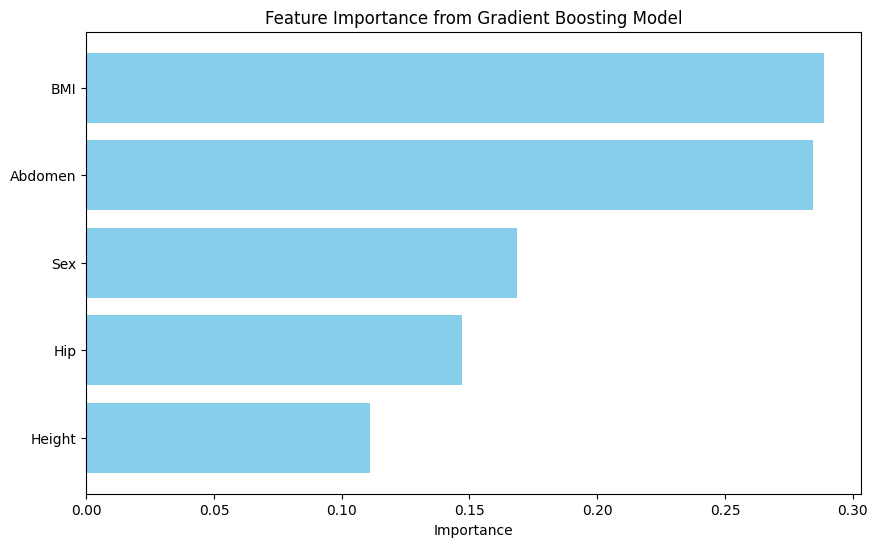

In [49]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# 1. Re-evaluasi Feature Selection menggunakan RFE
# Menggunakan RandomForestRegressor sebagai estimator untuk RFE
rf = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(estimator=rf, n_features_to_select=5)  # Misalkan kita ingin memilih 5 fitur
selector = selector.fit(X_train, y_train)

# Mendapatkan fitur yang terpilih
selected_features = X.columns[selector.support_]
print(f'Selected Features: {selected_features}')

# Menggunakan fitur yang terpilih untuk training
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# 2. Mencoba Model Lain: Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# 3. Menerapkan K-Fold Cross-Validation
cv_scores = cross_val_score(gb_model, X_train_selected, y_train, cv=5, scoring='neg_mean_absolute_error')

# Menghitung rata-rata MAE dari cross-validation
mean_cv_mae = -np.mean(cv_scores)
print(f'Mean Cross-Validated MAE: {mean_cv_mae}')

# Melatih model dengan data yang terpilih
gb_model.fit(X_train_selected, y_train)

# Membuat prediksi
predictions = gb_model.predict(X_test_selected)

# Evaluasi model
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Menampilkan hasil
print(f'Mean Absolute Error (Test): {mae}')
print(f'R-squared: {r_squared}')

# Visualisasi feature importance dari model Gradient Boosting
importances = gb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Gradient Boosting Model')
plt.gca().invert_yaxis()  # Membalik sumbu y untuk menampilkan fitur terpenting di atas
plt.show()

In [51]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Correlation between True Values and Predictions: 0.77


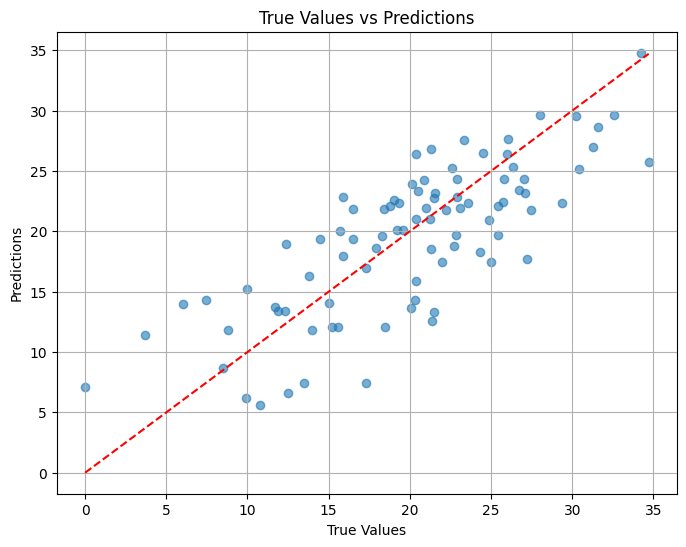

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan 'y_test' adalah nilai sebenarnya dan 'predictions' adalah prediksi model
# Hitung korelasi antara prediksi dan nilai sebenarnya
correlation = np.corrcoef(y_test, predictions)[0, 1]
print(f'Correlation between True Values and Predictions: {correlation:.2f}')

# Visualisasikan dengan scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis referensi
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.grid()
plt.show()

# confussion matriks

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Misalkan y_test dan predictions adalah array dari nilai sebenarnya dan prediksi
# Misalkan gender adalah array yang berisi 'Male' atau 'Female' untuk setiap entri

# Fungsi untuk mengkategorikan Body Fat Percentage
def categorize_body_fat(value, gender):
    if gender == 'Male':
        if value < 6:
            return 'Athletes'
        elif value < 14:
            return 'Fitness enthusiasts'
        elif value < 18:
            return 'Healthy average'
        elif value < 25:
            return 'Dangerously high (obese)'
        else:
            return 'Dangerously high (obese)'
    else:  # Female
        if value < 14:
            return 'Athletes'
        elif value < 21:
            return 'Fitness enthusiasts'
        elif value < 25:
            return 'Healthy average'
        elif value < 32:
            return 'Dangerously high (obese)'
        else:
            return 'Dangerously high (obese)'

# Kategorikan nilai sebenarnya dan prediksi
y_test_categories = [categorize_body_fat(value, gender) for value, gender in zip(y_test, gender)]
predictions_categories = [categorize_body_fat(value, gender) for value, gender in zip(predictions, gender)]

# Buat confusion matrix untuk Male dan Female
def plot_confusion_matrix(y_true, y_pred, gender):
    cm = confusion_matrix(y_true, y_pred, labels=[
        'Essential fat', 'Athletes', 'Fitness enthusiasts', 
        'Healthy average', 'Dangerously high (obese)'
    ])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
        'Essential fat', 'Athletes', 'Fitness enthusiasts', 
        'Healthy average', 'Dangerously high (obese)'
    ])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {gender}')
    plt.show()

# Pisahkan data berdasarkan gender
male_indices = [i for i, g in enumerate(gender) if g == 'Male']
female_indices = [i for i, g in enumerate(gender) if g == 'Female']

# Plot confusion matrix untuk Male
plot_confusion_matrix(
    np.array(y_test_categories)[male_indices], 
    np.array(predictions_categories)[male_indices], 
    'Male'
)

# Plot confusion matrix untuk Female
plot_confusion_matrix(
    np.array(y_test_categories)[female_indices], 
    np.array(predictions_categories)[female_indices], 
    'Female'
)

NameError: name 'gender' is not defined

Mean Absolute Error (CV): 3.711414747899159
Mean Absolute Error (Test): 3.416556818181817
R-squared: 0.6110738321086411


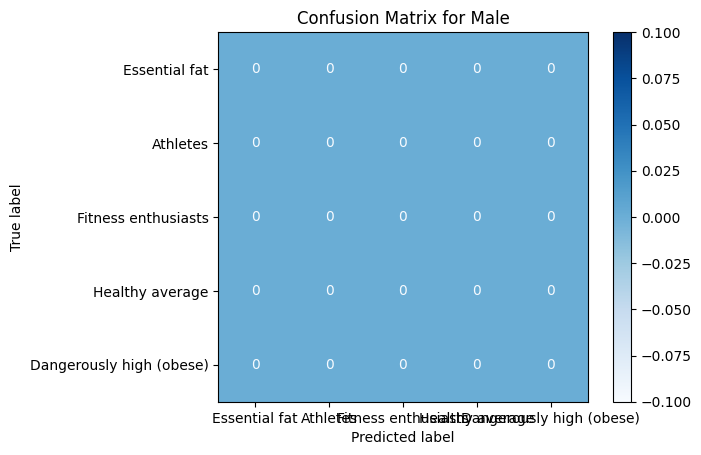

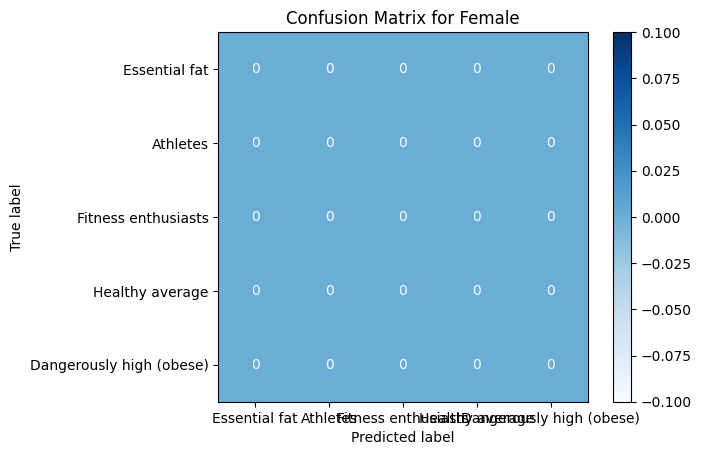

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Misalkan data sudah ada dalam DataFrame 'data'
X = data.drop(columns=['Original', 'BodyFat'])
y = data['BodyFat']

# Simpan informasi jenis kelamin sebelum encoding
gender = X['Sex'].copy()

# Label Encoding untuk kolom 'Sex'
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])  # 'F' menjadi 0 dan 'M' menjadi 1

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test, gender_train, gender_test = train_test_split(X_scaled, y, gender, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor()

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
mean_cv_score = -cv_scores.mean()  # Mengubah nilai negatif menjadi positif

# Train the model on the entire training set
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Menampilkan hasil
print(f'Mean Absolute Error (CV): {mean_cv_score}')
print(f'Mean Absolute Error (Test): {mae}')
print(f'R-squared: {r_squared}')

# Fungsi untuk mengkategorikan Body Fat Percentage
def categorize_body_fat(value, gender):
    if gender == 'Male':
        if value < 6:
            return 'Essential fat'
        elif value < 14:
            return 'Athletes'
        elif value < 18:
            return 'Fitness enthusiasts'
        elif value < 25:
            return 'Healthy average'
        else:
            return 'Dangerously high (obese)'
    else:  # Female
        if value < 14:
            return 'Essential fat'
        elif value < 21:
            return 'Athletes'
        elif value < 25:
            return 'Fitness enthusiasts'
        elif value < 32:
            return 'Healthy average'
        else:
            return 'Dangerously high (obese)'

# Kategorikan nilai sebenarnya dan prediksi
y_test_categories = [categorize_body_fat(value, gender_test.iloc[i]) for i, value in enumerate(y_test)]
predictions_categories = [categorize_body_fat(value, gender_test.iloc[i]) for i, value in enumerate(predictions)]

# Pisahkan data berdasarkan gender
male_indices = [i for i, g in enumerate(gender_test) if g == 'M']
female_indices = [i for i, g in enumerate(gender_test) if g == 'F']

# Plot confusion matrix untuk Male
def plot_confusion_matrix(y_true, y_pred, gender):
    cm = confusion_matrix(y_true, y_pred, labels=[
        'Essential fat', 'Athletes', 'Fitness enthusiasts', 
        'Healthy average', 'Dangerously high (obese)'
    ])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
        'Essential fat', 'Athletes', 'Fitness enthusiasts', 
        'Healthy average', 'Dangerously high (obese)'
    ])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {gender}')
    plt.show()

# Plot confusion matrix untuk Male
plot_confusion_matrix(
    np.array(y_test_categories)[male_indices], 
    np.array(predictions_categories)[male_indices], 
    'Male'
)

# Plot confusion matrix untuk Female
plot_confusion_matrix(
    np.array(y_test_categories)[female_indices], 
    np.array(predictions_categories)[female_indices], 
    'Female'
)

In [58]:
print("Unique values in y_test_categories:", set(y_test_categories))
print("Unique values in predictions_categories:", set(predictions_categories))


Unique values in y_test_categories: {'Athletes', 'Essential fat', 'Healthy average', 'Fitness enthusiasts', 'Dangerously high (obese)'}
Unique values in predictions_categories: {'Fitness enthusiasts', 'Athletes', 'Healthy average', 'Essential fat'}


In [59]:
print("Predictions:", predictions)


Predictions: [20.2197 23.6711 16.9177 28.4617 22.3017 20.4163 25.728  21.73   15.5245
 31.1632 22.3783 12.976  11.2985 21.576  10.7425  9.014  25.1662 21.6463
  9.0442 18.3927 16.461   8.3647 15.722  14.767  23.3872 23.6885 19.0289
 18.1282 17.9157 24.007  18.3183 19.1987 10.2782 23.1443 17.6285 11.36
 16.1273 19.751  28.236  24.7217 26.233  19.884  21.4509 24.0801 21.7973
 24.814  15.0931 18.003  22.6733 25.201  26.8137 23.5533 16.385  20.01
 17.8073 22.9822 20.928  22.0162 26.6776 18.507  16.418  21.73   22.0394
 25.9775 22.0086 22.5348 12.3216 23.6193 26.8844 21.014  29.404  20.45
 23.7348 23.1904 23.4317 12.4223 19.9218 14.4037  6.2397 24.0839 11.412
 16.2409 22.0254 29.0537 22.086  12.9253 22.8501 12.8891]


In [60]:
# Hitung jumlah prediksi yang salah
mismatches = sum([1 for actual, pred in zip(y_test_categories, predictions_categories) if actual != pred])

print(f"Jumlah prediksi yang salah: {mismatches}")
print(f"Total data: {len(y_test_categories)}")
print(f"Akurasi: {((len(y_test_categories) - mismatches) / len(y_test_categories)) * 100:.2f}%")


Jumlah prediksi yang salah: 45
Total data: 88
Akurasi: 48.86%


In [61]:
print(f"Total data dalam dataset asli: {len(data)}")


Total data dalam dataset asli: 436


In [64]:
# Pastikan kita menggunakan y_test untuk menghitung selisih absolut
absolute_differences = abs(predictions - y_test)

# Tentukan toleransi (misalnya, 2% dianggap cukup mendekati)
tolerance = 4

# Hitung jumlah prediksi yang cukup mendekati berdasarkan toleransi
close_matches = sum(1 for diff in absolute_differences if diff <= tolerance)

print(f"Jumlah prediksi yang cukup mendekati (dalam toleransi {tolerance}%): {close_matches}")
print(f"Total data uji: {len(y_test)}")
print(f"Akurasi mendekati: {(close_matches / len(y_test)) * 100:.2f}%")


Jumlah prediksi yang cukup mendekati (dalam toleransi 4%): 58
Total data uji: 88
Akurasi mendekati: 65.91%


# DATASET BARU SERIUS

## library

In [30]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [5]:
df = pd.read_csv('data/bodyfat_dataset.csv')

In [6]:
df.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BodyFat   436 non-null    float64
 1   Original  436 non-null    object 
 2   Sex       436 non-null    object 
 3   Age       436 non-null    int64  
 4   Weight    436 non-null    float64
 5   Height    436 non-null    float64
 6   Neck      436 non-null    float64
 7   Chest     436 non-null    float64
 8   Abdomen   436 non-null    float64
 9   Hip       436 non-null    float64
 10  Thigh     436 non-null    float64
 11  Knee      436 non-null    float64
 12  Ankle     436 non-null    float64
 13  Biceps    436 non-null    float64
 14  Forearm   436 non-null    float64
 15  Wrist     436 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 54.6+ KB


In [34]:
def describe(df):
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        
        if df[item].dtypes == 'float64' or df[item].dtypes == 'int64':
            min_.append(df[item].min())
            max_.append(df[item].max())
        else: 
            min_.append('Str')
            max_.append('Str')
            
    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing values' : missing,
        'Min': min_,
        'Max': max_
    })
    
    return output

In [35]:
des = describe(df)
des

,variable,dtype,count,unique,missing values,Min,Max
0,BodyFat,float64,436,344,0,0.0,47.5
1,Original,object,436,2,0,Str,Str
2,Sex,object,436,2,0,Str,Str
3,Age,int64,436,56,0,1,81
4,Weight,float64,436,261,0,42.1848,164.72
5,Height,float64,436,76,0,0.75,1.97
6,Neck,float64,436,120,0,26.0,51.2
7,Chest,float64,436,227,0,43.0,136.2
8,Abdomen,float64,436,247,0,58.0,148.1
9,Hip,float64,436,181,0,82.5,147.7


In [36]:
df.drop(columns=["Original"], inplace=True)

In [37]:
df.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## eda

In [38]:
df.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Text(0.5, 0.98, 'Visualizing Continuous Columns')

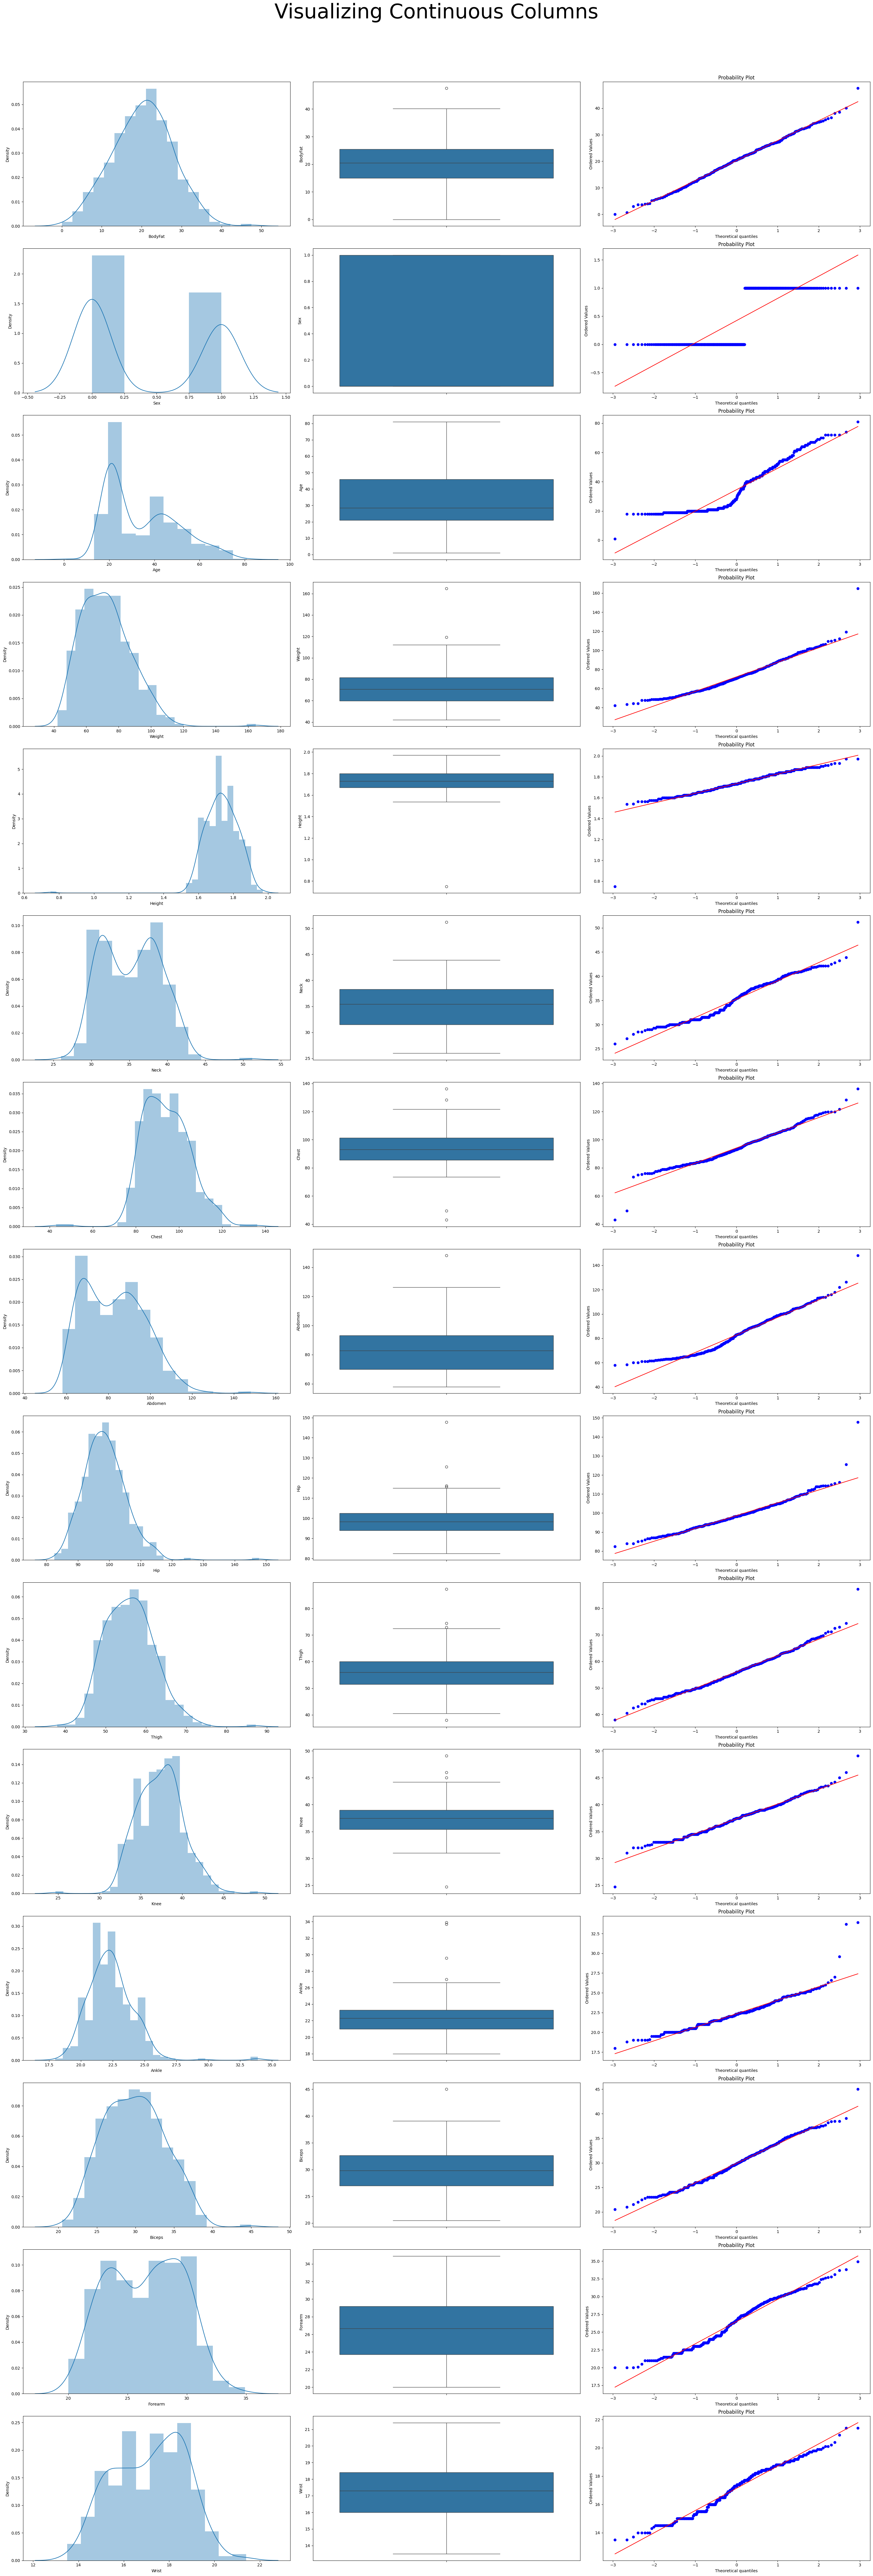

In [39]:
import warnings
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

df["Sex"] = df["Sex"].map({"M": 0, "F": 1})

warnings.filterwarnings('ignore')
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0])
    sns.boxplot(df[i],ax=ax[index,1])
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

In [29]:
df.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [40]:
from scipy.stats import skew
for col in df.columns:
    # Hitung skewness
    skewness = skew(data[col].dropna())
    print(f'Skewness of {col}: {skewness}')

Skewness of BodyFat: 0.0014978140377380337
Skewness of Sex: 0.315790987126033
Skewness of Age: 0.6750660023131551
Skewness of Weight: 0.8272792949351779
Skewness of Height: -2.189670235380887
Skewness of Neck: 0.19018314475018216
Skewness of Chest: 0.14126473006242984
Skewness of Abdomen: 0.48920918697483784
Skewness of Hip: 1.1223925207475278
Skewness of Thigh: 0.4833179103354051
Skewness of Knee: 0.16042272464872423
Skewness of Ankle: 1.4323061673148676
Skewness of Biceps: 0.20649261741070066
Skewness of Forearm: 0.0050901340938861415
Skewness of Wrist: -0.09613595744941554


    Feature        VIF
0       Sex   9.707964
1       Age   4.098103
2    Weight  38.788563
3    Height   2.414521
4      Neck  11.647193
5     Chest   8.708214
6   Abdomen  19.349808
7       Hip   8.674408
8     Thigh   9.094690
9      Knee   4.714028
10    Ankle   2.653891
11   Biceps   7.158559
12  Forearm   7.657099
13    Wrist   8.658194


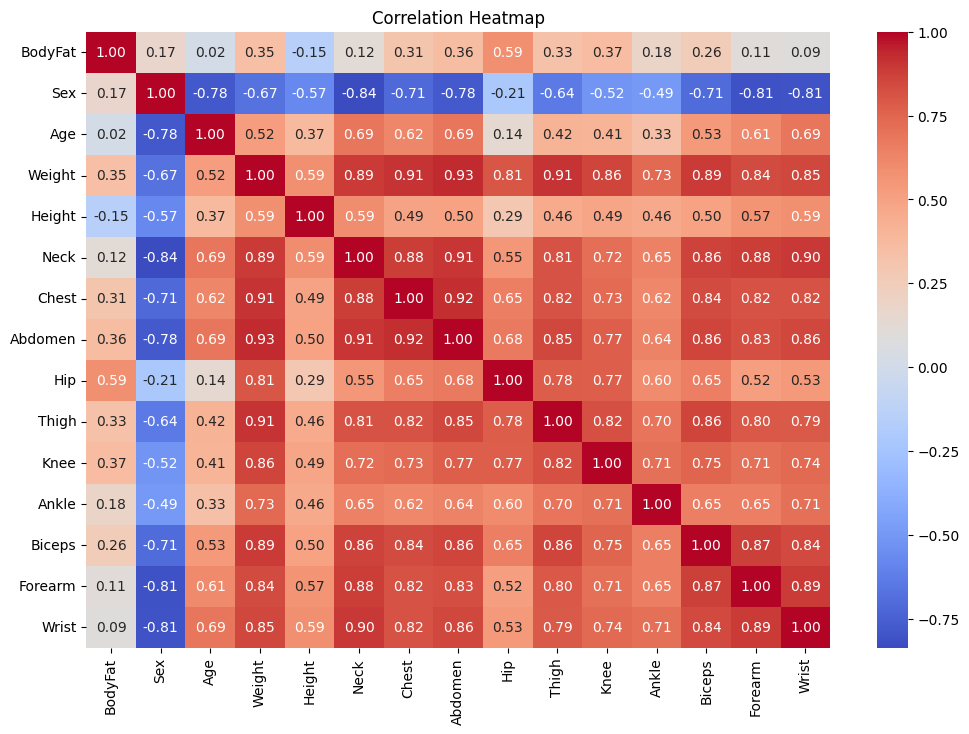

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# DataFrame untuk menyimpan nilai VIF
# 2. Menghitung VIF untuk Memilih Variabel yang Penting
# Memilih hanya variabel prediktor (independen) untuk menghitung VIF
predictors = df.drop(columns=["BodyFat"])  # Asumsi 'BodyDensity' adalah target
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

vif_data = pd.DataFrame()
vif_data["Feature"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors_scaled, i) for i in range(predictors_scaled.shape[1])]

print(vif_data)

# 3. Melihat Korelasi untuk Memilih Variabel Penting
# Plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target (y)
X = df.drop(columns=["BodyFat"])
y = df["BodyFat"]

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance)


    Feature  Importance
7       Hip    0.340629
6   Abdomen    0.235100
3    Height    0.106239
0       Sex    0.046693
13    Wrist    0.036490
4      Neck    0.033827
5     Chest    0.028925
12  Forearm    0.027465
9      Knee    0.027130
1       Age    0.026851
2    Weight    0.025737
11   Biceps    0.024138
8     Thigh    0.020403
10    Ankle    0.020372


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Define model and RFE selector
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Ubah jumlah fitur sesuai kebutuhan
rfe.fit(X, y)

# Display selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Sex', 'Height', 'Neck', 'Abdomen', 'Wrist'], dtype='object')


## model


In [4]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Load Dataset
# Gantilah "path_to_your_data" dengan path sebenarnya ke file data Anda
data = pd.read_csv("data/bodyfat_dataset.csv")

# 2. Encoding Kolom Kategori (Male/Female)
# Asumsi kolom gender bernama 'Sex' dan berisi nilai "Male" dan "Female"
if 'Sex' in data.columns:
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Male = 0, Female = 1

# 3. Memisahkan Fitur dan Target
# Misalnya, kita ingin memprediksi 'BodyFat' dan fitur lainnya digunakan sebagai prediktor
X = data.drop(columns=["BodyFat"])  # Semua kolom kecuali target
y = data["BodyFat"]                 # Kolom target yang ingin diprediksi

# 4. Membagi Data Menjadi Training dan Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Melatih Model Random Forest
# Menginisialisasi RandomForestRegressor dengan 100 trees (n_estimators=100)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Prediksi dengan Data Test
y_pred = model.predict(X_test)

# 7. Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# 8. Prediksi Baru (Opsional)
# Misalkan kita punya data baru dalam bentuk DataFrame tanpa kolom 'BodyFat'
# data_baru = pd.DataFrame({...})  # Data baru dengan fitur yang sama
# data_baru['Sex'] = label_encoder.transform(data_baru['Sex'])  # Pastikan 'Sex' di-encode
# predictions = model.predict(data_baru)

# Tampilkan hasil prediksi jika ada
# print(predictions)


Mean Squared Error (MSE): 17.592442346249996
R² Score: 0.6198153280812472


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def perform_evaluation(model):
    # eval on train data
    y_train_pred = model.predict(X_train)

    mse_train = mean_squared_error(y_train, y_train_pred).round(3)
    mae_train = mean_absolute_error(y_train, y_train_pred).round(3)
    r2_train = r2_score(y_train, y_train_pred).round(3)

    # eval on test data
    y_test_pred = model.predict(X_test)

    mse_test = mean_squared_error(y_test, y_test_pred).round(3)
    mae_test = mean_absolute_error(y_test, y_test_pred).round(3)
    r2_test = r2_score(y_test, y_test_pred).round(3)

    print(f"Train | Mean Squared Error: {mse_train} | Mean Absolute Error: {mae_train} | R-squared: {r2_train}")
    print(f"Test | Mean Squared Error: {mse_test} | Mean Absolute Error: {mae_test} | R-squared: {r2_test}")
    print()

In [6]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# bayesian search for best hyperparams
from skopt import BayesSearchCV

search_spaces = {
    "n_estimators": (10, 500),  # the number of trees in the forest
    "max_depth": (3, 20),  # the maximum depth of a tree
    "max_features": (0.1, 1.0),  # the number of features to consider when looking for the best split
    "max_samples": (0.1, 1.0),  # the number of samples to train each tree
    'min_samples_split': (2, 50),  # the minimum number of samples required to split an internal node
}
scoring = 'neg_mean_squared_error'
cv = 10  # cross validation
n_iter = 50
random_state = 42

# model
model_random_forest = BayesSearchCV(
    estimator=RandomForestRegressor(n_jobs=24, random_state=random_state),
    search_spaces=search_spaces,
    scoring=scoring,
    cv=cv,
    n_iter=n_iter,
    random_state=random_state,
)

# train
np.int = np.int64  # to fix bug in skopt
model_random_forest.fit(X_train, y_train)

print("Random Forest Regression:")
perform_evaluation(model_random_forest)

# get the searched hyperparams
best_hyperparams = model_random_forest.best_params_
print("Best Hyperparameters:", best_hyperparams)

Random Forest Regression:
Train | Mean Squared Error: 6.665 | Mean Absolute Error: 2.043 | R-squared: 0.886
Test | Mean Squared Error: 17.836 | Mean Absolute Error: 3.393 | R-squared: 0.615

Best Hyperparameters: OrderedDict([('max_depth', 10), ('max_features', 0.9281960308131219), ('max_samples', 0.96716988427677), ('min_samples_split', 10), ('n_estimators', 187)])


tree 7 in forest:


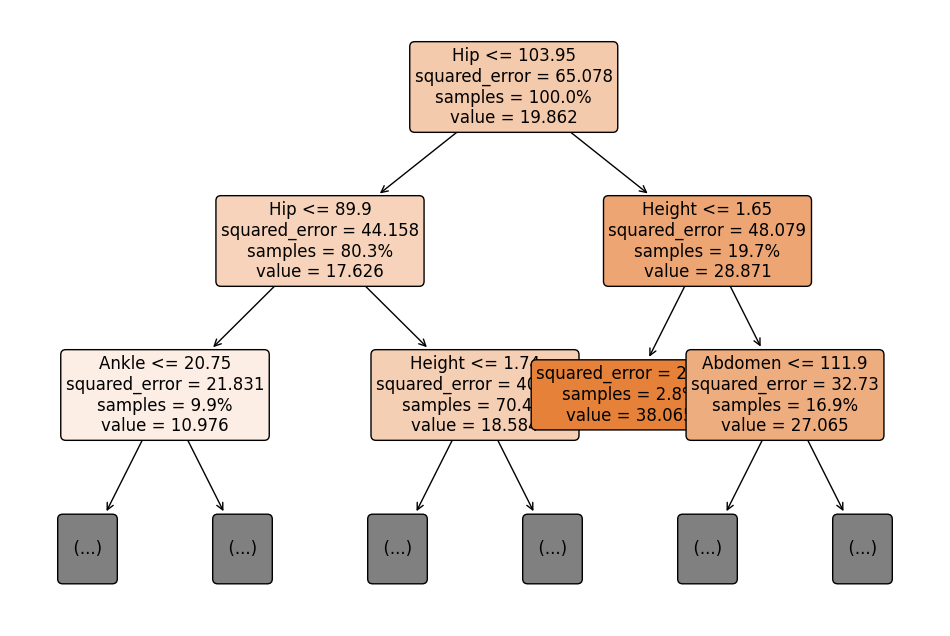

In [13]:
import matplotlib.pyplot as plt
import random
from sklearn.tree import plot_tree


random_index = random.randint(0, best_hyperparams['n_estimators']-1)
random_tree = model_random_forest.best_estimator_[random_index]
print(f"tree {random_index} in forest:")
plt.figure(figsize=(12, 8))
plot_tree(random_tree, max_depth=2, feature_names=X_train.columns, fontsize=12, filled=True, proportion=True, rounded=True)
plt.show()

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# bayesian search for best hyperparams
from skopt import BayesSearchCV

search_spaces = {
    "learning_rate": (0.05, 1.0),  # learning rate shrinks the contribution of each tree
    "n_estimators": (1, 100),  # the number of boosting stages to perform
    "subsample": (0.1, 1.0),  # the fraction of samples to be used for fitting the individual base learners
    'min_samples_split': (2, 50),  # the minimum number of samples required to split an internal node
    "max_depth": (1, 5),  # maximum depth of the individual regression estimators
    "max_features": (0.1, 1.0),  # the number of features to consider when looking for the best split
}
scoring = 'neg_mean_squared_error'
cv = 10  # cross validation
n_iter = 50
random_state = 0

# model
model_gradient_boost = BayesSearchCV(
    estimator=GradientBoostingRegressor(random_state=random_state),
    search_spaces=search_spaces,
    scoring=scoring,
    cv=cv,
    n_iter=n_iter,
    random_state=random_state,
)

# train
np.int = np.int64  # to fix bug in skopt
model_gradient_boost.fit(X_train, y_train)

print("Gradient Boosting Regression:")
perform_evaluation(model_gradient_boost)

# get the searched hyperparams
best_hyperparams = model_gradient_boost.best_params_
print("Best Hyperparameters:", best_hyperparams)

Gradient Boosting Regression:
Train | Mean Squared Error: 6.278 | Mean Absolute Error: 2.005 | R-squared: 0.893
Test | Mean Squared Error: 17.974 | Mean Absolute Error: 3.459 | R-squared: 0.612

Best Hyperparameters: OrderedDict([('learning_rate', 0.13750610119083978), ('max_depth', 5), ('max_features', 0.8715084997365412), ('min_samples_split', 50), ('n_estimators', 49), ('subsample', 0.628425045196221)])


In [15]:
from sklearn.svm import SVR
import numpy as np

# bayesian search for best hyperparams
from skopt import BayesSearchCV

search_spaces = {
    "C": (0.01, 10.0),  # the strength of regularization is inversely proportional to C
    "epsilon": (0.01, 10.0),
}
scoring = 'neg_mean_squared_error'
cv = 10  # cross validation
n_iter = 50
random_state = 0

# model
model_svr_linear = BayesSearchCV(
    estimator=SVR(kernel='linear'),
    search_spaces=search_spaces,
    scoring=scoring,
    cv=cv,
    n_iter=n_iter,
    random_state=random_state,
)

# train
np.int = np.int64  # to fix bug in skopt
model_svr_linear.fit(X_train, y_train)

from sklearn.svm import SVR
import numpy as np

# bayesian search for best hyperparams
from skopt import BayesSearchCV

search_spaces = {
    "C": (0.01, 10.0),  # the strength of regularization is inversely proportional to C
    "epsilon": (0.01, 10.0),
}
scoring = 'neg_mean_squared_error'
cv = 10  # cross validation
n_iter = 50
random_state = 0

# model
model_svr_linear = BayesSearchCV(
    estimator=SVR(kernel='linear'),
    search_spaces=search_spaces,
    scoring=scoring,
    cv=cv,
    n_iter=n_iter,
    random_state=random_state,
)

# train
np.int = np.int64  # to fix bug in skopt
model_svr_linear.fit(X_train, y_train)

BayesSearchCV(cv=10, estimator=SVR(kernel='linear'), random_state=0,
              scoring='neg_mean_squared_error',
              search_spaces={'C': (0.01, 10.0), 'epsilon': (0.01, 10.0)})

In [17]:
print("SVR with linear kernel:")
perform_evaluation(model_svr_linear)

# get the searched hyperparams
best_hyperparams = model_svr_linear.best_params_
print("Best Hyperparameters:", best_hyperparams)

SVR with linear kernel:
Train | Mean Squared Error: 16.949 | Mean Absolute Error: 3.33 | R-squared: 0.711
Test | Mean Squared Error: 15.679 | Mean Absolute Error: 3.218 | R-squared: 0.661

Best Hyperparameters: OrderedDict([('C', 7.521289719694299), ('epsilon', 2.597085622071617)])


## beda model serius

In [18]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.4/124.9 MB 3.9 MB/s eta 0:00:32
   ---------------------------------------- 0.9/124.9 MB 5.7 MB/s eta 0:00:22
   ---------------------------------------- 1.3/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 1.6/124.9 MB 6.7 MB/s eta 0:00:19
    --------------------------------------- 1.6/124.9 MB 5.5 MB/s eta 0:00:23
    --------------------------------------- 1.6/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 1.7/124.9 MB 4.3 MB/s eta 0:00:29
    --------------------------------------- 1.7/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 1.8/124.9 MB 3.8 MB/s eta 0:00:33
    --------------------------------------- 1.8/124.9 MB 3.4 MB/s eta 0:00:37


In [19]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars

In [31]:
df= pd.read_csv('data/bodyfat_dataset.csv')
df.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [32]:
df['Sex'].isnull().sum()

0

In [33]:
df['Sex'] = df['Sex'].map({ 'M': 1, 'F': 0})
df['BMI'] = df['Weight'] / (df['Height'] * df['Height']) # fitur baru

X = df.drop(columns=['BodyFat', 'Forearm', 'Ankle', 'Biceps']) #drop beberapa kolom yang tidak penting
y = df['BodyFat']

In [34]:
X.isnull().sum()

Sex        0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Wrist      0
BMI        0
dtype: int64

In [35]:
df['Sex'].head()

0    1
1    1
2    1
3    1
4    1
Name: Sex, dtype: int64

In [36]:
kf = KFold(n_splits=5, shuffle=True, random_state=2)

In [37]:
xgb = XGBRegressor(random_state=2, subsample=0.9,
                   n_estimators=1000, max_depth=4, learning_rate=0.005, 
                   eval_metric='mae', colsample_bytree=0.9)

mae_scores_xgb = cross_val_score(xgb, X, y, cv=kf, scoring='neg_mean_absolute_error')

print("XGB MAE Scores:", -mae_scores_xgb)
print('XGB Mean MAE:', "{:.3f}".format(np.mean(-mae_scores_xgb)))

XGB MAE Scores: [3.37933247 3.35463281 3.19991649 3.61834129 4.26127753]
XGB Mean MAE: 3.563


In [38]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, KFold
import numpy as np

# Definisikan model
xgb = XGBRegressor(random_state=2, subsample=0.9,
                   n_estimators=1000, max_depth=4, learning_rate=0.005, 
                   eval_metric='mae', colsample_bytree=0.9)

# Definisikan cross-validation (misalnya 5-fold CV)
kf = KFold(n_splits=5, shuffle=True, random_state=2)

# Evaluasi model menggunakan MAE dan R²
scores = cross_validate(xgb, X, y, cv=kf, scoring=['neg_mean_absolute_error', 'r2'])

# Konversi skor MAE ke nilai positif
mae_scores = -scores['test_neg_mean_absolute_error']
r2_scores = scores['test_r2']

# Cetak hasil MAE dan R²
print("XGB MAE Scores:", mae_scores)
print("XGB Mean MAE:", "{:.3f}".format(np.mean(mae_scores)))
print()
print("XGB R² Scores:", r2_scores)
print("XGB Mean R²:", "{:.3f}".format(np.mean(r2_scores)))


XGB MAE Scores: [3.37933247 3.35463281 3.19991649 3.61834129 4.26127753]
XGB Mean MAE: 3.563

XGB R² Scores: [0.68065502 0.69743095 0.65148532 0.58232033 0.644545  ]
XGB Mean R²: 0.651


In [39]:
bay = BayesianRidge()
mae_scores_bay = cross_val_score(bay, X, y, cv=kf, scoring='neg_mean_absolute_error')

print("Bayesian MAE Scores:", -mae_scores_bay)
print('Bayesian Mean MAE:', "{:.3f}".format(np.mean(-mae_scores_bay)))

Bayesian MAE Scores: [3.14997969 4.56237662 3.02425522 3.36826003 4.13505299]
Bayesian Mean MAE: 3.648


Fit xgb and bayesian ridge on the whole dataset, then create the meta dataset with these two formulas obtained by Symbolic Regression:

y_sr1 = (abs(abs(Neck) - ((Abdomen - exp(Height)) / 1.1648)) - ((Wrist * sin(Sex)) - (-1.7683)))

y_sr2 = (((BMI - (sin(Sex) (Hip - (Abdomen / 0.95054)))) cos(Sex / Height)) - (sin(Wrist) + Sex))

In [40]:
xgb.fit(X,y)
y_xgb = xgb.predict(X)

bay.fit(X,y)
y_bay = bay.predict(X)

df['y_sr1'] = (abs(abs(df['Neck']) - ((df['Abdomen'] - np.exp(df['Height'])) / 1.1648)) - ((df['Wrist'] * np.sin(df['Sex'])) - (-1.7683)))
df['y_sr2'] = (((df['BMI'] - (np.sin(df['Sex']) * (df['Hip'] - (df['Abdomen'] / 0.95054)))) * np.cos(df['Sex'] / df['Height'])) - (np.sin(df['Wrist']) + df['Sex']))


meta_data = pd.DataFrame({
    'y': y,
    'y_xgb': y_xgb,
    'y_bay': y_bay,
    'y_sr1': df['y_sr1'],
    'y_sr2': df['y_sr2']
})

### hasil

In [55]:
X_meta = meta_data.drop(columns=['y'])
y_meta = meta_data['y']

lad = LassoLars(alpha=0)

scores = cross_validate(
    lad, X_meta, y_meta, cv=kf,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
)

# Mengonversi MAE dan MSE menjadi nilai positif (karena scoring mengembalikan nilai negatif)
mae_scores = -scores['test_neg_mean_absolute_error']
mse_scores = -scores['test_neg_mean_squared_error']
r2_scores = scores['test_r2']

# Menampilkan hasil evaluasi untuk setiap metrik
print("LAD Regressor MAE Scores:", mae_scores)
print("LAD Regressor Mean MAE:", "{:.3f}".format(np.mean(mae_scores)))
print()

print("LAD Regressor MSE Scores:", mse_scores)
print("LAD Regressor Mean MSE:", "{:.3f}".format(np.mean(mse_scores)))
print()

print("LAD Regressor R² Scores:", r2_scores)
print("LAD Regressor Mean R²:", "{:.3f}".format(np.mean(r2_scores)))


LAD Regressor MAE Scores: [1.70700101 1.61233655 1.92097104 1.67290337 1.71462826]
LAD Regressor Mean MAE: 1.726

LAD Regressor MSE Scores: [4.82562972 4.22989783 6.3552641  4.38763707 4.38215475]
LAD Regressor Mean MSE: 4.836

LAD Regressor R² Scores: [0.89571485 0.91776294 0.88932061 0.93627089 0.92043673]
LAD Regressor Mean R²: 0.912


In [56]:
import joblib

# Simpan model ke file
joblib.dump(lad, 'lad_regressor_model.pkl')

print("Model telah disimpan sebagai 'lad_regressor_model.pkl'")

Model telah disimpan sebagai 'lad_regressor_model.pkl'


In [49]:
meta_data.head()

,y,y_xgb,y_bay,y_sr1,y_sr2
0,12.3,14.739504,15.131117,15.993741,16.327024
1,6.1,8.062548,9.797857,10.268114,11.276143
2,25.3,23.243742,19.974544,21.120462,15.583915
3,10.4,10.963230,12.636032,14.287070,13.368910
4,28.7,27.420862,26.465124,29.543392,23.995129


In [52]:
df['Sex'].nunique()

2

### confussion matriks

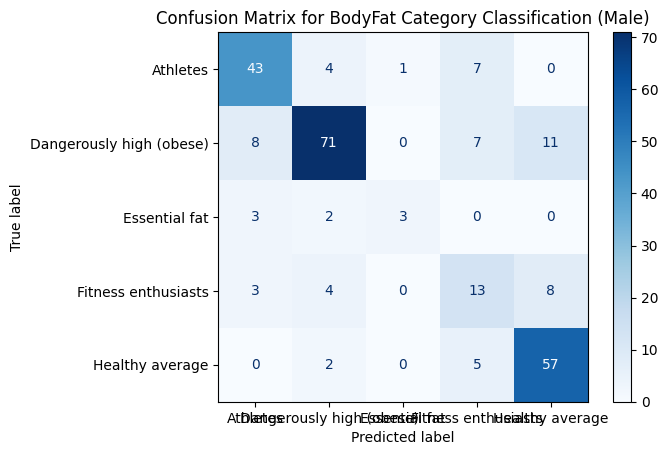

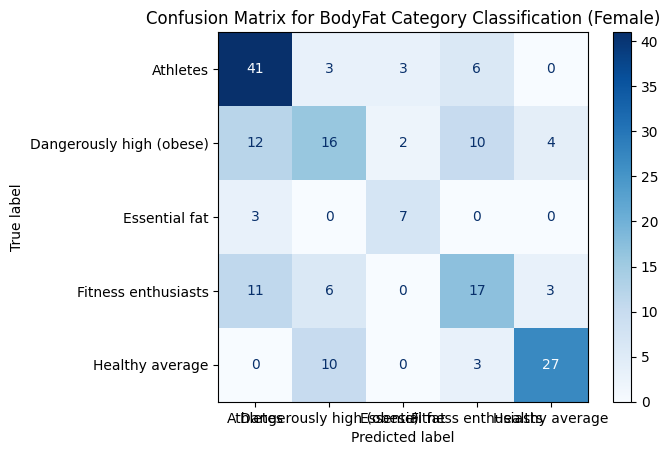

In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoLars
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Pastikan kolom 'Sex' ada di `X_meta`
if 'Sex' not in X_meta.columns:
    X_meta['Sex'] = df['Sex']  # Pastikan kolom Sex ada di meta_data

# Fungsi untuk mengkategorikan BodyFat berdasarkan batasan
def categorize_bodyfat(value, sex):
    if sex == 1:  # Male
        if value <= 5:
            return 'Essential fat'
        elif 6 <= value <= 13:
            return 'Athletes'
        elif 14 <= value <= 17:
            return 'Fitness enthusiasts'
        elif 18 <= value <= 24:
            return 'Healthy average'
        else:
            return 'Dangerously high (obese)'
    elif sex == 0:  # Female
        if value <= 13:
            return 'Essential fat'
        elif 14 <= value <= 20:
            return 'Athletes'
        elif 21 <= value <= 24:
            return 'Fitness enthusiasts'
        elif 25 <= value <= 31:
            return 'Healthy average'
        else:
            return 'Dangerously high (obese)'

# Definisikan model LAD Regressor
lad = LassoLars(alpha=0)

# Cross-validation dengan prediksi (menggunakan cross_val_predict untuk mendapatkan prediksi langsung)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(lad, X_meta.drop(columns=['Sex']), y_meta, cv=kf)

# Kategorikan `y_meta` dan `y_pred` berdasarkan kolom `Sex` di `X_meta`
y_meta_classified = [categorize_bodyfat(y, sex) for y, sex in zip(y_meta, X_meta['Sex'])]
y_pred_classified = [categorize_bodyfat(pred, sex) for pred, sex in zip(y_pred, X_meta['Sex'])]

# Pisahkan confusion matrix berdasarkan jenis kelamin
for sex, label in [(1, "Male"), (0, "Female")]:
    # Filter data untuk jenis kelamin tertentu
    y_true_sex = [y for y, s in zip(y_meta_classified, X_meta['Sex']) if s == sex]
    y_pred_sex = [p for p, s in zip(y_pred_classified, X_meta['Sex']) if s == sex]
    
    # Confusion Matrix untuk jenis kelamin tertentu
    cm = confusion_matrix(y_true_sex, y_pred_sex, labels=np.unique(y_meta_classified))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_meta_classified))
    disp.plot(cmap="Blues")
    
    plt.title(f"Confusion Matrix for BodyFat Category Classification ({label})")
    plt.show()


## pipeline model

In [59]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge, LassoLars
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error
import joblib

# Memuat data
df = pd.read_csv('data/bodyfat_dataset.csv')
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['BMI'] = df['Weight'] / (df['Height'] ** 2)  # fitur BMI

X = df.drop(columns=['BodyFat', 'Forearm', 'Ankle', 'Biceps'])
y = df['BodyFat']

# Inisialisasi KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=2)

# Inisialisasi model dasar
xgb = XGBRegressor(random_state=2, subsample=0.9, n_estimators=1000, max_depth=4, learning_rate=0.005, eval_metric='mae', colsample_bytree=0.9)
bay = BayesianRidge()

# Melatih model dasar dengan cross-validation dan menyimpan prediksi
y_xgb_cv = np.zeros(len(y))
y_bay_cv = np.zeros(len(y))

for train_index, test_index in kf.split(X):
    # Train-test split
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # XGB Model
    xgb.fit(X_train, y_train)
    y_xgb_cv[test_index] = xgb.predict(X_test)
    
    # Bayesian Ridge Model
    bay.fit(X_train, y_train)
    y_bay_cv[test_index] = bay.predict(X_test)

# Membuat fitur tambahan (y_sr1 dan y_sr2) dengan rumus khusus
df['y_sr1'] = (abs(abs(df['Neck']) - ((df['Abdomen'] - np.exp(df['Height'])) / 1.1648)) - ((df['Wrist'] * np.sin(df['Sex'])) - (-1.7683)))
df['y_sr2'] = (((df['BMI'] - (np.sin(df['Sex']) * (df['Hip'] - (df['Abdomen'] / 0.95054)))) * np.cos(df['Sex'] / df['Height'])) - (np.sin(df['Wrist']) + df['Sex']))

# Menggabungkan prediksi menjadi meta-data
meta_data = pd.DataFrame({
    'y': y,
    'y_xgb': y_xgb_cv,
    'y_bay': y_bay_cv,
    'y_sr1': df['y_sr1'],
    'y_sr2': df['y_sr2']
})

# Data untuk model meta
X_meta = meta_data.drop(columns=['y'])
y_meta = meta_data['y']

# Inisialisasi model meta
lad = LassoLars(alpha=0)

# Evaluasi model meta dengan cross-validation untuk MAE, MSE, dan R²
scores = cross_validate(
    lad, X_meta, y_meta, cv=kf,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
)

# Mengonversi MAE dan MSE menjadi nilai positif (karena scoring mengembalikan nilai negatif)
mae_scores = -scores['test_neg_mean_absolute_error']
mse_scores = -scores['test_neg_mean_squared_error']
r2_scores = scores['test_r2']

# Menampilkan hasil evaluasi untuk setiap metrik
print("LAD Regressor MAE Scores:", mae_scores)
print("LAD Regressor Mean MAE:", "{:.3f}".format(np.mean(mae_scores)))
print()

print("LAD Regressor MSE Scores:", mse_scores)
print("LAD Regressor Mean MSE:", "{:.3f}".format(np.mean(mse_scores)))
print()

print("LAD Regressor R² Scores:", r2_scores)
print("LAD Regressor Mean R²:", "{:.3f}".format(np.mean(r2_scores)))

# Simpan semua model yang digunakan (XGBoost, Bayesian Ridge, LassoLars)
joblib.dump(xgb, 'xgb_model.pkl')
joblib.dump(bay, 'bayesian_model.pkl')
joblib.dump(lad, 'lad_meta_model.pkl')
print("Semua model telah disimpan.")

# Pipeline untuk prediksi pada data baru
def predict_pipeline(data_baru):
    # 1. Prediksi dengan model dasar
    xgb_model = joblib.load('xgb_model.pkl')
    bayesian_model = joblib.load('bayesian_model.pkl')
    lad_meta_model = joblib.load('lad_meta_model.pkl')
    
    # Menghitung y_xgb dan y_bay
    y_xgb_new = xgb_model.predict(data_baru)
    y_bay_new = bayesian_model.predict(data_baru)
    
    # Menghitung y_sr1 dan y_sr2 dengan rumus
    data_baru['BMI'] = data_baru['Weight'] / (data_baru['Height'] ** 2)
    y_sr1_new = abs(abs(data_baru['Neck']) - ((data_baru['Abdomen'] - np.exp(data_baru['Height'])) / 1.1648)) - ((data_baru['Wrist'] * np.sin(data_baru['Sex'])) - (-1.7683))
    y_sr2_new = ((data_baru['BMI'] - (np.sin(data_baru['Sex']) * (data_baru['Hip'] - (data_baru['Abdomen'] / 0.95054))) * np.cos(data_baru['Sex'] / data_baru['Height'])) - (np.sin(data_baru['Wrist']) + data_baru['Sex']))
    
    # Gabungkan prediksi menjadi satu DataFrame untuk model meta
    meta_features = pd.DataFrame({
        'y_xgb': y_xgb_new,
        'y_bay': y_bay_new,
        'y_sr1': y_sr1_new,
        'y_sr2': y_sr2_new
    })
    
    # 2. Prediksi dengan model meta
    final_prediction = lad_meta_model.predict(meta_features)
    
    return final_prediction




LAD Regressor MAE Scores: [3.00733955 3.36548733 2.79284395 3.36015929 3.828069  ]
LAD Regressor Mean MAE: 3.271

LAD Regressor MSE Scores: [14.69862556 18.32374486 13.36735975 18.3122363  21.05584275]
LAD Regressor Mean MSE: 17.152

LAD Regressor R² Scores: [0.73577372 0.68966871 0.70009451 0.64759195 0.69384969]
LAD Regressor Mean R²: 0.693
Semua model telah disimpan.


In [ ]:
# Contoh penggunaan pipeline dengan data baru
data_baru = pd.DataFrame({
    'Neck': [36],
    'Abdomen': [86],
    'Weight': [72],
    'Height': [1.76],
    'Wrist': [18],
    'Hip': [95],
    'Sex': [1]  # 1 untuk Male, 0 untuk Female
})

# Prediksi akhir menggunakan pipeline
hasil_prediksi = predict_pipeline(data_baru)
print("Hasil Prediksi Akhir:", hasil_prediksi)

# asli

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge, LassoLars
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Memuat data
df = pd.read_csv('data/bodyfat_dataset.csv')
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['BMI'] = df['Weight'] / (df['Height'] ** 2)  # fitur BMI

# Fitur dan target
X = df.drop(columns=['BodyFat', 'Forearm', 'Ankle', 'Biceps'])
y = df['BodyFat']

# Membuat fitur tambahan y_sr1 dan y_sr2
df['y_sr1'] = abs(abs(df['Neck']) - ((df['Abdomen'] - np.exp(df['Height'])) / 1.1648)) - ((df['Wrist'] * np.sin(df['Sex'])) - (-1.7683))
df['y_sr2'] = ((df['BMI'] - (np.sin(df['Sex']) * (df['Hip'] - (df['Abdomen'] / 0.95054))) * np.cos(df['Sex'] / df['Height'])) - (np.sin(df['Wrist']) + df['Sex']))

# Menambahkan fitur tambahan ke X
X = X.assign(y_sr1=df['y_sr1'], y_sr2=df['y_sr2'])

# Inisialisasi model dasar
xgb = XGBRegressor(random_state=2, subsample=0.9, n_estimators=1000, max_depth=4, learning_rate=0.005, eval_metric='mae', colsample_bytree=0.9)
bay = BayesianRidge()

# Inisialisasi model meta (menggunakan LassoLars sebagai regressor meta)
meta_model = LassoLars(alpha=0)

# Menggunakan StackingRegressor
stacked_model = StackingRegressor(
    estimators=[('xgb', xgb), ('bayesian', bay)],
    final_estimator=meta_model,
    cv=KFold(n_splits=5, shuffle=True, random_state=2)
)

# Evaluasi model menggunakan cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=2)
scores = cross_val_score(stacked_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores = -scores

# Menampilkan hasil evaluasi MAE
print("Stacking Regressor MAE Scores:", mae_scores)
print("Stacking Regressor Mean MAE:", "{:.3f}".format(np.mean(mae_scores)))

# Evaluasi model untuk MSE dan R² secara manual (melatih model di seluruh dataset)
stacked_model.fit(X, y)
y_pred = stacked_model.predict(X)

mse_score = mean_squared_error(y, y_pred)
r2_score_value = r2_score(y, y_pred)

print("Stacking Regressor MSE Score:", mse_score)
print("Stacking Regressor R² Score:", r2_score_value)

# Simpan model stacked
joblib.dump(stacked_model, 'stacked_model.pkl')
print("Model stacked telah disimpan.")






Stacking Regressor MAE Scores: [3.38090709 3.78437835 2.91097134 3.57993929 3.62882691]
Stacking Regressor Mean MAE: 3.457
Stacking Regressor MSE Score: 6.751553086909056
Stacking Regressor R² Score: 0.8797646095192893
Model stacked telah disimpan.


In [10]:
# Pipeline untuk prediksi pada data baru
def predict_pipeline(data_baru):
    # Muat model stacked
    stacked_model = joblib.load('saved_model/stacked_model.pkl')
    
    # Hitung fitur tambahan
    data_baru['BMI'] = data_baru['Weight'] / (data_baru['Height'] ** 2)
    data_baru['y_sr1'] = abs(abs(data_baru['Neck']) - ((data_baru['Abdomen'] - np.exp(data_baru['Height'])) / 1.1648)) - ((data_baru['Wrist'] * np.sin(data_baru['Sex'])) - (-1.7683))
    data_baru['y_sr2'] = ((data_baru['BMI'] - (np.sin(data_baru['Sex']) * (data_baru['Hip'] - (data_baru['Abdomen'] / 0.95054))) * np.cos(data_baru['Sex'] / data_baru['Height'])) - (np.sin(data_baru['Wrist']) + data_baru['Sex']))

    # Prediksi dengan model stacked
    final_prediction = stacked_model.predict(data_baru)
    
    return final_prediction

In [15]:
# Pipeline untuk prediksi pada data baru
def predict_pipeline(data_baru):
    # Muat model stacked
    stacked_model = joblib.load('saved_model/stacked_model.pkl')
    
    # Hitung fitur tambahan
    data_baru['BMI'] = data_baru['Weight'] / (data_baru['Height'] ** 2)
    data_baru['y_sr1'] = abs(abs(data_baru['Neck']) - ((data_baru['Abdomen'] - np.exp(data_baru['Height'])) / 1.1648)) - ((data_baru['Wrist'] * np.sin(data_baru['Sex'])) - (-1.7683))
    data_baru['y_sr2'] = ((data_baru['BMI'] - (np.sin(data_baru['Sex']) * (data_baru['Hip'] - (data_baru['Abdomen'] / 0.95054))) * np.cos(data_baru['Sex'] / data_baru['Height'])) - (np.sin(data_baru['Wrist']) + data_baru['Sex']))

    # Prediksi dengan model stacked
    final_prediction = stacked_model.predict(data_baru)
    
    return final_prediction

# Contoh inputan data baru
data_baru_dict = {
    'Age': [25],               # usia
    'Weight': [70],            # berat badan dalam kg
    'Height': [1.75],          # tinggi badan dalam meter
    'Neck': [40],              # lingkar leher dalam cm
    'Chest': [95],             # lingkar dada dalam cm
    'Abdomen': [85],           # lingkar perut dalam cm
    'Hip': [90],               # lingkar pinggul dalam cm
    'Thigh': [50],             # lingkar paha dalam cm
    'Knee': [37],              # lingkar lutut dalam cm          # lingkar lengan bawah dalam cm
    'Wrist': [18],             # lingkar pergelangan tangan dalam cm
    'Sex': [1]                 # jenis kelamin (1 untuk pria, 0 untuk wanita)
}

# Konversi inputan ke DataFrame
data_baru_df = pd.DataFrame(data_baru_dict)

# Urutan fitur yang digunakan saat melatih model
feature_order = ['Sex', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 
                 'Thigh', 'Knee', 'Wrist', 'BMI', 'y_sr1', 'y_sr2']

# Sesuaikan urutan fitur pada data_baru
data_baru_df = data_baru_df.reindex(columns=feature_order)

# Prediksi menggunakan fungsi pipeline
hasil_prediksi = predict_pipeline(data_baru_df)

# Tampilkan hasil prediksi
print("Hasil Prediksi Body Fat untuk Inputan Baru:", hasil_prediksi[0])


Hasil Prediksi Body Fat untuk Inputan Baru: 11.108924670790602
